In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt

In [53]:
fem_merged_sums = pd.read_csv("./data/merged_fem_sums_dataset.csv")

/var/folders/zl/1tvb16z55nl5z3qjjlv168lr0000gn/T/ipykernel_11500/2134856044.py:1: DtypeWarning: Columns (13,21) have mixed types. Specify dtype option on import or set low_memory=False.
  fem_merged_sums = pd.read_csv("./data/merged_fem_sums_dataset.csv")


In [54]:
fem_merged_sums.drop(columns=[
       'Unnamed: 0.1', 'Unnamed: 0',
       'player_a_id', 'assoc_a', 'name_a', 'player_x_id', 'assoc_x', 'name_x',
       'winner_dbl', 'winner_dbl_names','private_key_a', 'private_key_x'
       ], inplace=True)


In [55]:
y = fem_merged_sums['winner_bool'].map({True:1, False:0})

In [56]:
#y = fem_merged_sums['winner_bool']

X = fem_merged_sums.drop(columns=[#'winner', 'winner_namer', 'winner_bool', 'player_id_a', 'name_x', 'player_id_x', 'name_x',
                             'g1a', 'g1x', 'g2a', 'g2x',
       'g3a', 'g3x', 'g4a', 'g4x', 'g5a', 'g5x', 'g6a', 'g6x', 'g7a', 'g7x'])
X.drop(columns=['inj', 'points_a', 'points_x', 'wo', 'name_x.1', 'name_a.1', 'res_a','res_x', 'gender_a', 'gender_x','tournament_id', 'group','winner', 'winner_namer','winner_bool','player_id_a','player_id_x', 'style_x', 'grip_x', 'style_a', 'grip_a','team_match', 'handness_a', 'handness_x'], inplace=True)

In [57]:
event_map = {'WS' : 0, 'U21WS': 1, 'WT': 0, 'JGT': 2, 'CGS': 3, 'JGS': 2, 'CGT': 3, 'JGD': 2, 'YOGT': 4,
       'XT': 0, 'WT_U21': 1, 'U21WT': 1, 'U19WT': 2, 'U19WS': 2, 'U17WS': 2, 'CBS': 3, 'MCGS': 5,
       'WD': 0, 'U15WT': 3, 'HGS': 0, 'JBT':2, 'U19GS':2, 'CGD':2, 'U15WS':2, 'MT':0,
       'U13WS':4, 'U11WS':5}

# use the map method to replace the color column with integers
X['event'] = X['event'].map(event_map)

In [58]:
X['stage'].unique()

stage_map = {'Main Draw' : 2, 'Qualification': 1, 'Pre. Round': 1, 'Preliminary': 1,
       'Consolation': 3, 'Qualification - 2nd Stage': 1, 'Main Draw - Day 1': 2,
       'Qualification - Division 2': 1, 'Main Draw - Division 2': 2, pd.NA:0,
       'Position matches - Division 1': 2, 'Qualification - Division 1': 1,
       'Position Draw': 2, 'Qualification - Division 3': 1,
       'Main Draw - Division 1': 2, 'Position matches - Division 3': 2,
       'Position matches 69- Division 3':2, 'Main Draw - Division 3':2,
       'Main Draw - Stage 2':2, 'Main Draw - Stage 2 (Bronze Match)':2,
       'Position matches 57-60 - Division 3':2, 'Main Draw C': 2,
       'Main Draw B': 2, 'Position matches - Division 2': 2,
       'Main Draw - Day 2': 2, 'Main Draw A': 2,
       'Main Draw - Stage 2 (5-8th place)': 2,
       'Position matches 61-64 - Division 3': 2, 'MAIN': 2, 'GROUPS': 1,
       'Main Draw - Stage 1': 2, 'MAIN|5|8': 2,
       'Main Draw - Stage 2 (5th place)': 2,
       'Main Draw - Stage 2 (7th place)': 2}

X['stage'] = X['stage'].map(stage_map)

In [59]:
X['event_type'].unique()

event_type_map = {'KO':2, 'Group':1, 'Progressive':3, 'Progressive KO':3, 'GP12':4, pd.NA:0,
       'R32-':6, '8FNL':7, 'QFNL':8, 'RND2':6, 'R64-':5, 'RND1':5, 'FNL-':10, 'SFNL':9,
       'GP05':4, 'GP03':4, 'GP11':4, 'GP01':4, 'GP06':4, 'GP13':4, 'GP08':4, 'GP02':4,
       'GP14':4, 'GP04':4, 'GP10':4, 'GP09':4, 'GP07':4}

X['event_type'] = X['event_type'].map(event_type_map)

In [60]:
ass = X['association_a'].unique().tolist() + X['association_x'].unique().tolist()
ass = list(set(ass))
association_map = {}
for i in range(len(ass)):
    association_map[ass[i]] = i+1
print(association_map)
X['association_a'] = X['association_a'].map(association_map)
X['association_x'] = X['association_x'].map(association_map)


{'MEX': 1, 'DJI': 2, 'HUN': 3, 'SAM': 4, 'CAF': 5, 'TPE': 6, 'TUR': 7, 'ANG': 8, 'BRN': 9, 'QAT': 10, 'LTU': 11, 'CHN': 12, 'PHI': 13, 'TAN': 14, 'SVK': 15, 'SOL': 16, 'SGP': 17, 'MAW': 18, 'GRE': 19, 'PLW': 20, 'SEN': 21, 'GUI': 22, 'MDA': 23, 'AZE': 24, 'BOT': 25, 'ESA': 26, 'DEN': 27, 'IRL': 28, 'VEN': 29, 'ENG': 30, 'VAN': 31, 'PNG': 32, 'BOL': 33, 'GRN': 34, 'BAN': 35, 'LCA': 36, 'BRA': 37, 'TOG': 38, 'NRU': 39, 'NED': 40, 'HKG': 41, 'CGO': 42, 'HAI': 43, 'CZE': 44, 'MAF': 45, 'POL': 46, 'CAN': 47, 'IMN': 48, 'COK': 49, 'IND': 50, 'BIZ': 51, 'DOM': 52, 'COL': 53, 'VIE': 54, 'KOS': 55, 'GGY': 56, 'AUS': 57, 'ESP': 58, 'KIR': 59, 'NZL': 60, 'CHA': 61, 'FGU': 62, 'GAB': 63, 'LBR': 64, 'LBA': 65, 'DMA': 66, 'COM': 67, 'MRI': 68, 'CUB': 69, 'NAM': 70, 'BHU': 71, 'NIC': 72, 'SKN': 73, 'LBN': 74, 'USA': 75, 'THA': 76, 'ROU': 77, 'KOR': 78, 'CUW': 79, 'SRB': 80, 'SWE': 81, 'SUR': 82, 'UZB': 83, 'CYP': 84, 'BRU': 85, 'TJK': 86, 'FSM': 87, 'BIH': 88, 'FIN': 89, 'LES': 90, 'TUV': 91, 'SUD': 

In [61]:
activity_map = {'T': 2, 'F':1}
X['activity_a'] = X['activity_a'].map(activity_map)
X['activity_x'] = X['activity_x'].map(activity_map)

In [62]:
X.fillna(0, inplace=True)
X = X.astype({'stage': 'int32', 'age_a':'int32', 'age_x':'int32',
              'total_matches_a':'int32','total_wins_a':'int32',
              'total_losses_a':'int32', 'year_matches_a':'int32',
            'year_wins_a':'int32', 'year_losses_a':'int32',
             'total_matches_x':'int32','total_wins_x':'int32',
              'total_losses_x':'int32', 'year_matches_x':'int32',
            'year_wins_x':'int32', 'year_losses_x':'int32' })

In [63]:
np_y = y.to_numpy()

In [64]:
np_y_one_hot = tf.one_hot(np_y, 2).numpy()

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, np_y_one_hot, test_size=0.15, random_state=42)

In [66]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(2, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [67]:
callbacks = [tf.keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)]

history = model.fit(X_train, y_train, epochs=10, callbacks=callbacks)
accuracy = history.history['accuracy']
loss = history.history['loss']
epochs = range(1, len(accuracy) + 1)


Epoch 1/10
    7/12365 [..............................] - ETA: 1:54 - loss: 5901.0972 - accuracy: 0.4063 

2023-05-12 18:17:28.992415: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


12365/12365 [==============================] - 96s 8ms/step - loss: 83.8278 - accuracy: 0.6416
Epoch 2/10
12365/12365 [==============================] - 96s 8ms/step - loss: 43.2094 - accuracy: 0.6428
Epoch 3/10
12365/12365 [==============================] - 97s 8ms/step - loss: 38.5821 - accuracy: 0.6453
Epoch 4/10
12365/12365 [==============================] - 97s 8ms/step - loss: 35.4305 - accuracy: 0.6463
Epoch 5/10
12365/12365 [==============================] - 97s 8ms/step - loss: 33.0887 - accuracy: 0.6463
Epoch 6/10
12365/12365 [==============================] - 98s 8ms/step - loss: 29.4445 - accuracy: 0.6504
Epoch 7/10
12365/12365 [==============================] - 100s 8ms/step - loss: 28.0241 - accuracy: 0.6462
Epoch 8/10
12365/12365 [==============================] - 94s 8ms/step - loss: 26.1175 - accuracy: 0.6476
Epoch 9/10
12365/12365 [==============================] - 94s 8ms/step - loss: 21.8612 - accuracy: 0.6528
Epoch 10/10
12365/12365 [==============================]

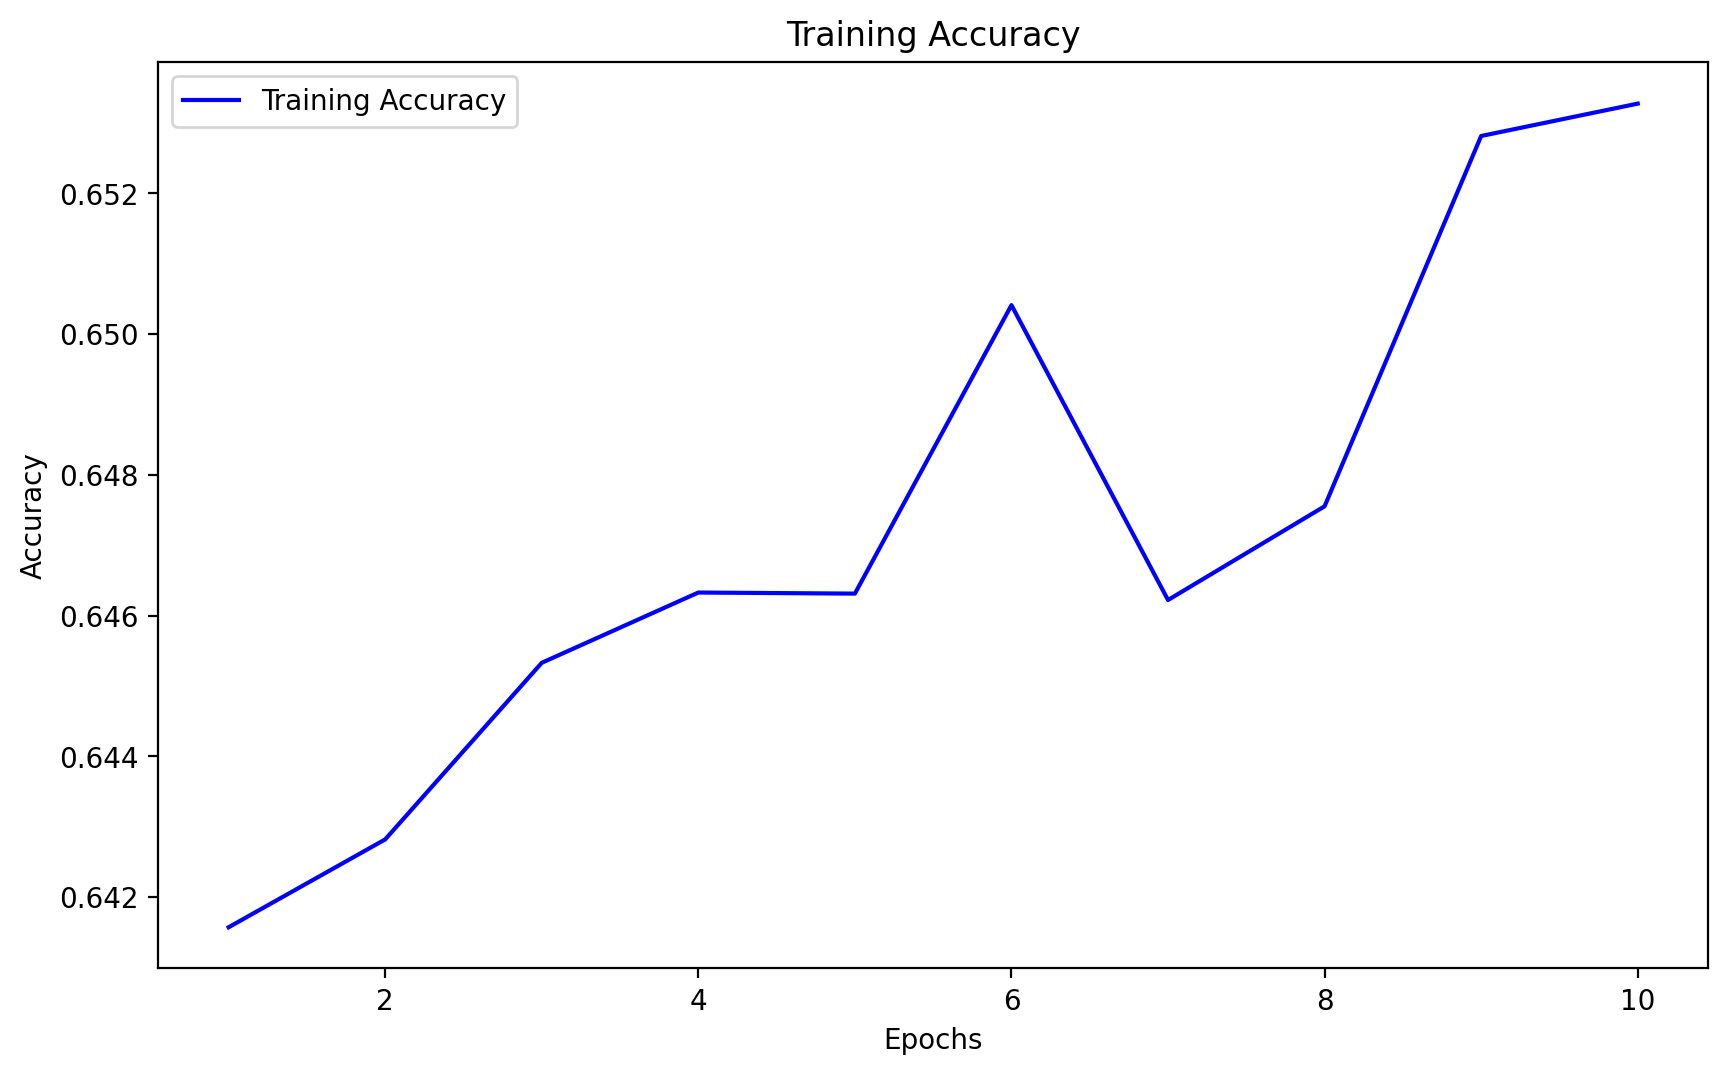

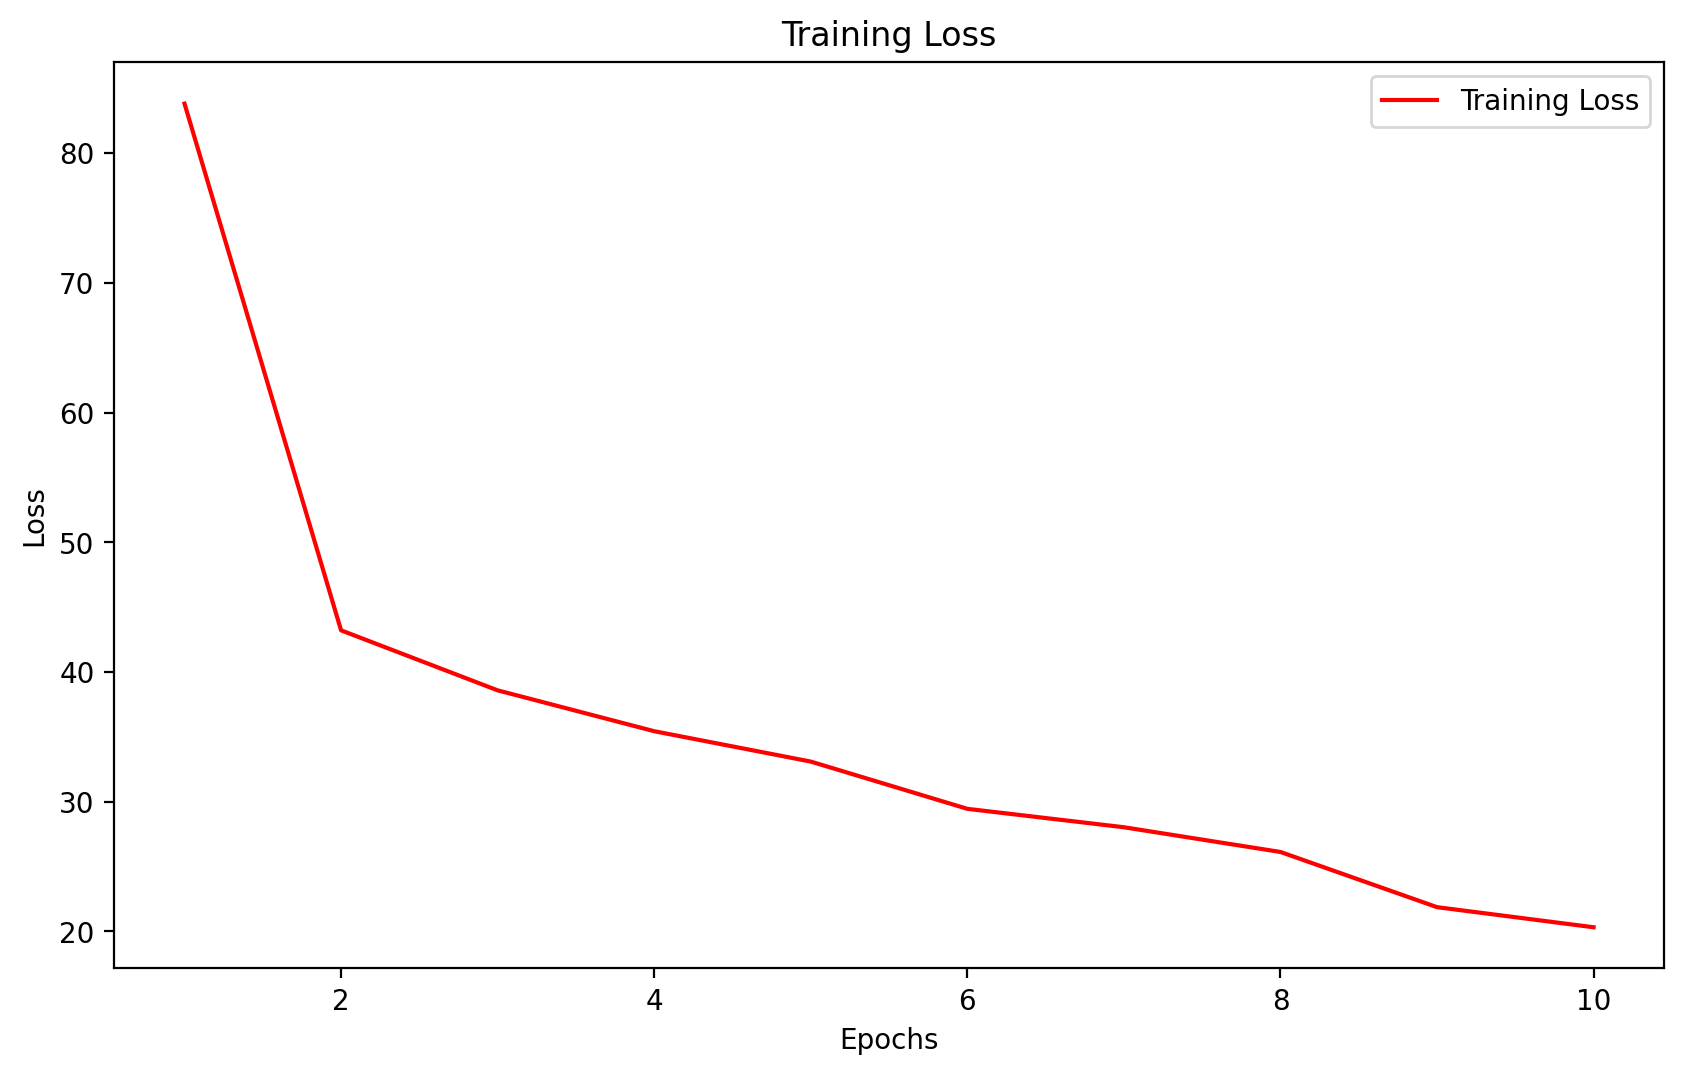

In [70]:
# Plot accuracy
plt.figure(figsize=(10, 6), dpi=200)
plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(10, 6), dpi=200)
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()